In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import optuna
import shap

from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


d:\01 Professional software operation\minicondaa\envs\wone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = 'S_CS-figure'

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"文件夹 {folder_path} 已创建。")

In [3]:
df = pd.read_csv("S_CSlog_填充.csv",  dtype={'DIPOCE': str, 'BA_Code': str, 'Cata_Code': str, 'FM_N': str})
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,CHS,A_Mix_T,AB_Mix_T,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC,S_CS
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,294.0,5.10,0.00,100000,108.6000,0.001667,0,90.8000,5.777174
1,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,289.8,5.29,0.00,100000,94.1000,0.001667,1,90.8000,3.567935
2,0100010000,31.4,537.000000,6.137392,1000,18.0,1.500000,0.060000,0.025000,0.010000,...,60.000000,35.0,35.00,629.03,010000,222.8860,0.002074,0,82.2307,3.169014
3,0100010000,31.4,698.000000,6.187663,1000,18.0,1.153000,0.038500,0.019000,0.007700,...,53.600000,35.0,35.00,629.03,010000,182.1925,0.002095,0,84.9192,4.727273
4,0100010000,31.4,480.000000,6.362176,1000,18.0,1.670000,0.056000,0.028000,0.011000,...,62.500000,35.0,35.00,629.03,010000,223.4620,0.002074,0,79.8028,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0110000010,31.0,450.000000,3.000000,1000,18.0,55.555556,0.333333,1.166667,0.222222,...,64.285714,120.0,30.00,48.00,100000,120.0000,0.001991,0,96.1000,13.688525
196,0110000010,31.0,450.000000,3.000000,1000,18.0,54.644809,0.437158,1.147541,0.218579,...,64.664311,120.0,30.00,48.00,100000,137.0000,0.001983,0,95.1000,12.666667
197,0110000010,31.0,450.000000,3.000000,1000,18.0,53.475936,0.534759,1.122995,0.213904,...,65.156794,120.0,30.00,48.00,100000,151.0000,0.001983,0,94.0000,12.111111
198,0110000010,31.0,450.000000,3.000000,1000,18.0,52.631579,0.631579,1.105263,0.210526,...,65.517241,120.0,30.00,48.00,100000,180.0000,0.001983,0,93.1000,9.135802


In [4]:

y = np.log10(df['S_CS'])

X = df.drop(["S_CS"], axis=1)
X

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,A_Mix_T,AB_Mix_T,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,294.0,5.10,0.00,100000,108.6000,0.001667,0,90.8000
1,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,289.8,5.29,0.00,100000,94.1000,0.001667,1,90.8000
2,0100010000,31.4,537.000000,6.137392,1000,18.0,1.500000,0.060000,0.025000,0.010000,...,0.70,60.000000,35.0,35.00,629.03,010000,222.8860,0.002074,0,82.2307
3,0100010000,31.4,698.000000,6.187663,1000,18.0,1.153000,0.038500,0.019000,0.007700,...,0.70,53.600000,35.0,35.00,629.03,010000,182.1925,0.002095,0,84.9192
4,0100010000,31.4,480.000000,6.362176,1000,18.0,1.670000,0.056000,0.028000,0.011000,...,0.70,62.500000,35.0,35.00,629.03,010000,223.4620,0.002074,0,79.8028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0110000010,31.0,450.000000,3.000000,1000,18.0,55.555556,0.333333,1.166667,0.222222,...,1.05,64.285714,120.0,30.00,48.00,100000,120.0000,0.001991,0,96.1000
196,0110000010,31.0,450.000000,3.000000,1000,18.0,54.644809,0.437158,1.147541,0.218579,...,1.05,64.664311,120.0,30.00,48.00,100000,137.0000,0.001983,0,95.1000
197,0110000010,31.0,450.000000,3.000000,1000,18.0,53.475936,0.534759,1.122995,0.213904,...,1.05,65.156794,120.0,30.00,48.00,100000,151.0000,0.001983,0,94.0000
198,0110000010,31.0,450.000000,3.000000,1000,18.0,52.631579,0.631579,1.105263,0.210526,...,1.05,65.517241,120.0,30.00,48.00,100000,180.0000,0.001983,0,93.1000


In [5]:
params = {'iterations':1100,
            'depth': 5,
            'learning_rate': 0.014,
            'l2_leaf_reg': 2.9,
            'bagging_temperature': 0.56,
            'border_count': 137,
      }

In [6]:
# 定义 RSE 计算函数
def calculate_rse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - y_mean) ** 2)
    rse = np.sqrt(numerator / denominator) if denominator != 0 else np.nan
    return rse

# 定义评估函数
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    rse = calculate_rse(y_true, y_pred)
    return r2, mae, mse, rmse, rse

# 设置随机种子范围
random_seeds = range(0, 100)

# 评估结果列表
scores = []

# 多种子 5 折交叉验证
for seed in random_seeds:
    print(f"Evaluating with Random Seed: {seed}")
    kf = KFold(n_splits=3, shuffle=True, random_state=seed)

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = CatBoostRegressor(**params, random_seed=seed, verbose=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2, mae, mse, rmse, rse = evaluate_model(y_test, y_pred)

        scores.append({
            "Seed": seed,
            "Fold": fold_idx,
            "R²": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "RSE": rse
        })

# 转换为 DataFrame
score_df1 = pd.DataFrame(scores)


Evaluating with Random Seed: 0
Evaluating with Random Seed: 1
Evaluating with Random Seed: 2
Evaluating with Random Seed: 3
Evaluating with Random Seed: 4
Evaluating with Random Seed: 5
Evaluating with Random Seed: 6
Evaluating with Random Seed: 7
Evaluating with Random Seed: 8
Evaluating with Random Seed: 9
Evaluating with Random Seed: 10
Evaluating with Random Seed: 11
Evaluating with Random Seed: 12
Evaluating with Random Seed: 13
Evaluating with Random Seed: 14
Evaluating with Random Seed: 15
Evaluating with Random Seed: 16
Evaluating with Random Seed: 17
Evaluating with Random Seed: 18
Evaluating with Random Seed: 19
Evaluating with Random Seed: 20
Evaluating with Random Seed: 21
Evaluating with Random Seed: 22
Evaluating with Random Seed: 23
Evaluating with Random Seed: 24
Evaluating with Random Seed: 25
Evaluating with Random Seed: 26
Evaluating with Random Seed: 27
Evaluating with Random Seed: 28
Evaluating with Random Seed: 29
Evaluating with Random Seed: 30
Evaluating with Ra

In [7]:
# 计算每个种子的 R² 方差
r2_var_by_seed = score_df1.groupby("Seed")["R²"].var(ddof=1).reset_index()
r2_var_by_seed.columns = ["Seed", "R2_Variance"]
r2_var_sorted = r2_var_by_seed.sort_values(by="R2_Variance")

# 输出最稳定与最不稳定的种子，根据方差
print("🎯 最稳定的5个种子：")
print(r2_var_sorted.head())

print("\n⚠️ 最不稳定的5个种子：")
print(r2_var_sorted.tail())


🎯 最稳定的5个种子：
    Seed  R2_Variance
96    96     0.000025
43    43     0.000057
74    74     0.000102
72    72     0.000119
23    23     0.000216

⚠️ 最不稳定的5个种子：
    Seed  R2_Variance
56    56     0.019998
30    30     0.022053
28    28     0.030238
94    94     0.044718
2      2     0.083673


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30460\1142677326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seed', y='R2_Variance', data=r2_var_sorted, palette='viridis')


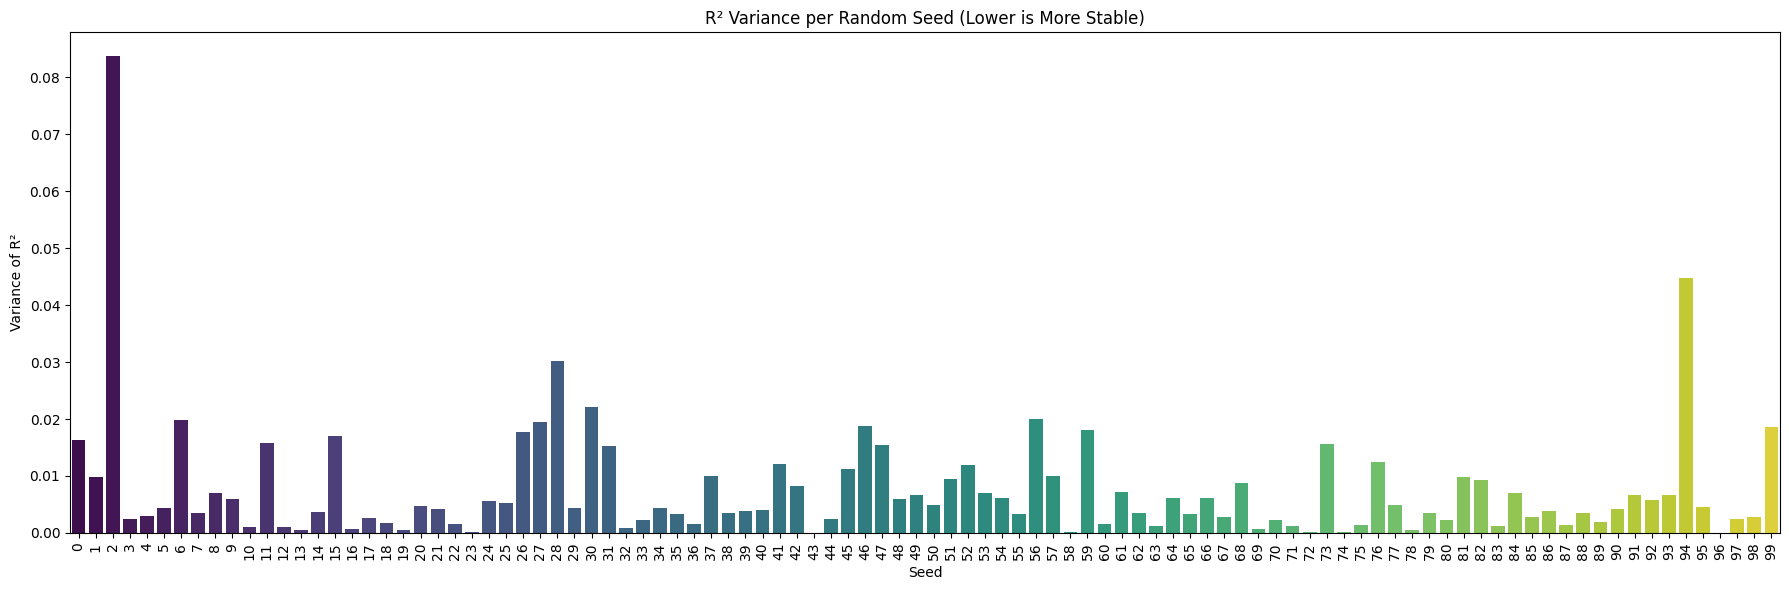

In [8]:
# 绘制种子方差柱状图
plt.figure(figsize=(18, 6))
sns.barplot(x='Seed', y='R2_Variance', data=r2_var_sorted, palette='viridis')
plt.title('R² Variance per Random Seed (Lower is More Stable)')
plt.xlabel('Seed')
plt.ylabel('Variance of R²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


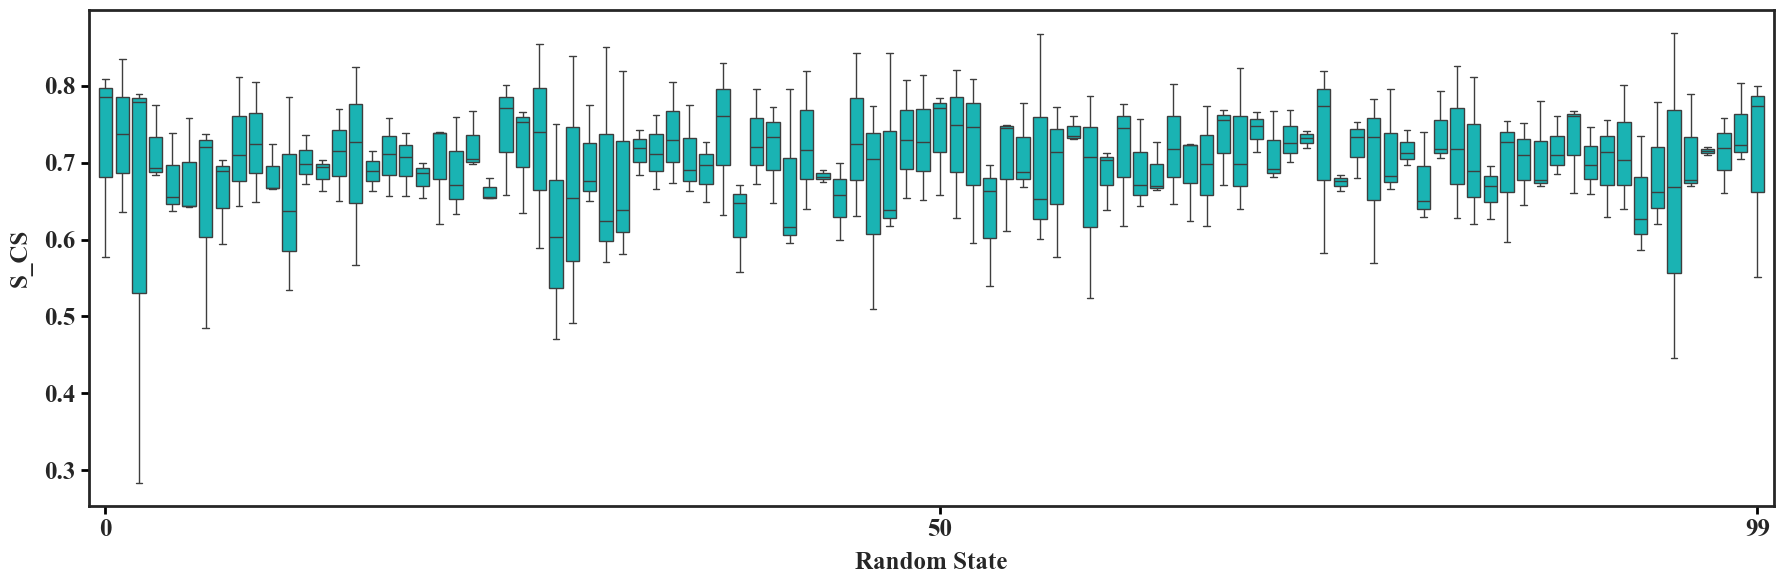

In [9]:
plt.figure(figsize=(18, 6))
sns.set(style="white", palette="muted", font_scale=1)

sns.boxplot(x='Seed', y='R²', data=score_df1, color='#00CDCD', linewidth=1, width=0.8, fliersize=5 )

# 设置横坐标仅显示特定的种子编号
plt.xticks(ticks=[0, 50, 99], labels=['0', '50', '99'], fontsize=18, fontname='Times New Roman', weight='bold')
plt.xlim(-1, 100)  # 设置x轴范围
plt.yticks(fontsize=18, fontname='Times New Roman', weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=6, width=2, color='black', bottom=True, top=False, left=True, right=False)

# 设置标题和标签
plt.xlabel('Random State', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)
plt.ylabel('S_CS', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)

# 设置边框粗细，比如加粗到2
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

# 去除顶部和右侧边框
# sns.despine()

plt.tight_layout()
plt.show()


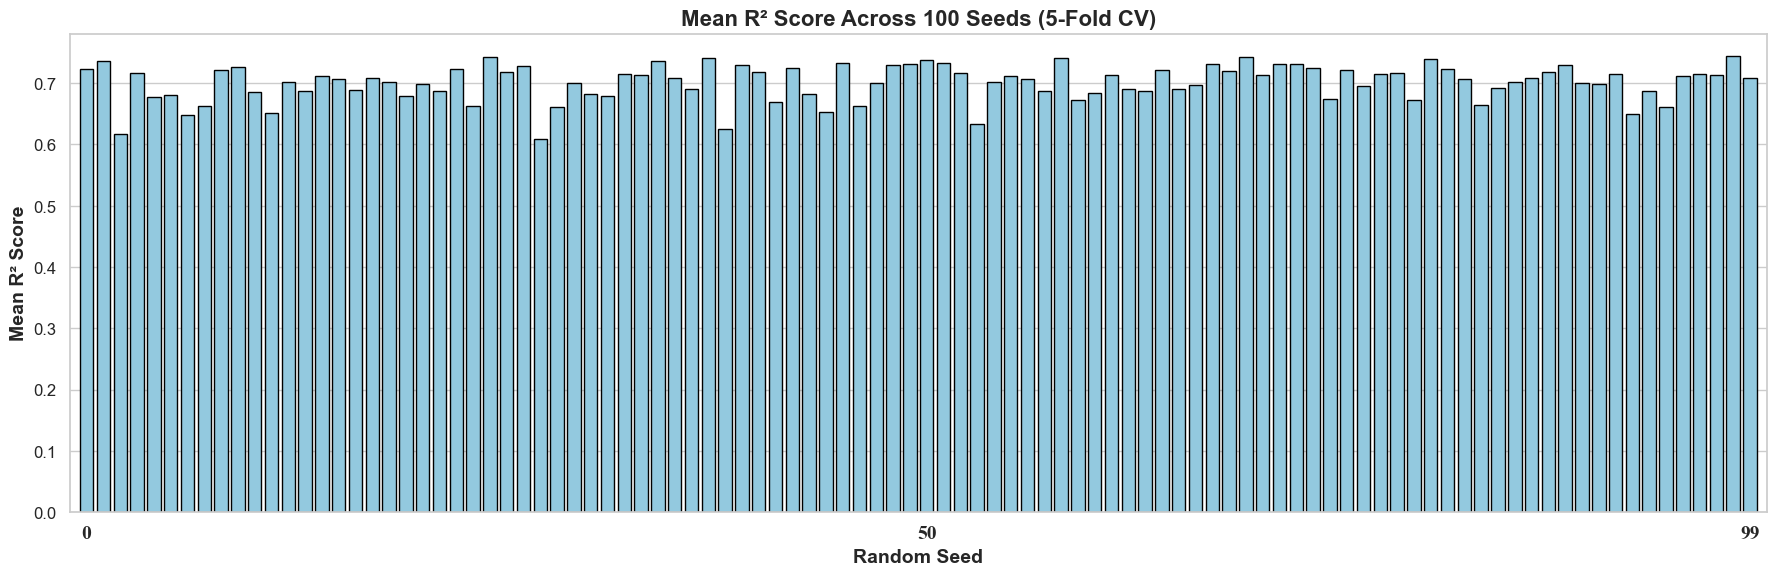

In [10]:
# 计算每个种子的平均 R² 值
mean_r2_df = score_df1.groupby('Seed', as_index=False)['R²'].mean()

# 设置绘图风格
sns.set(style="whitegrid", font_scale=1.2)

# 创建柱状图
plt.figure(figsize=(18, 6))
sns.barplot(x='Seed', y='R²', data=mean_r2_df, color='skyblue', edgecolor='black')

# 设置坐标轴范围和刻度
plt.xlim(-1, 100)
plt.xticks(ticks=[0, 50, 99],  labels=['0', '50', '99'],  fontsize=14,  fontname='Times New Roman',  weight='bold')
plt.yticks(fontsize=12)

# 设置标题和轴标签
plt.title('Mean R² Score Across 100 Seeds (5-Fold CV)', fontsize=16, fontweight='bold')
plt.xlabel('Random Seed', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


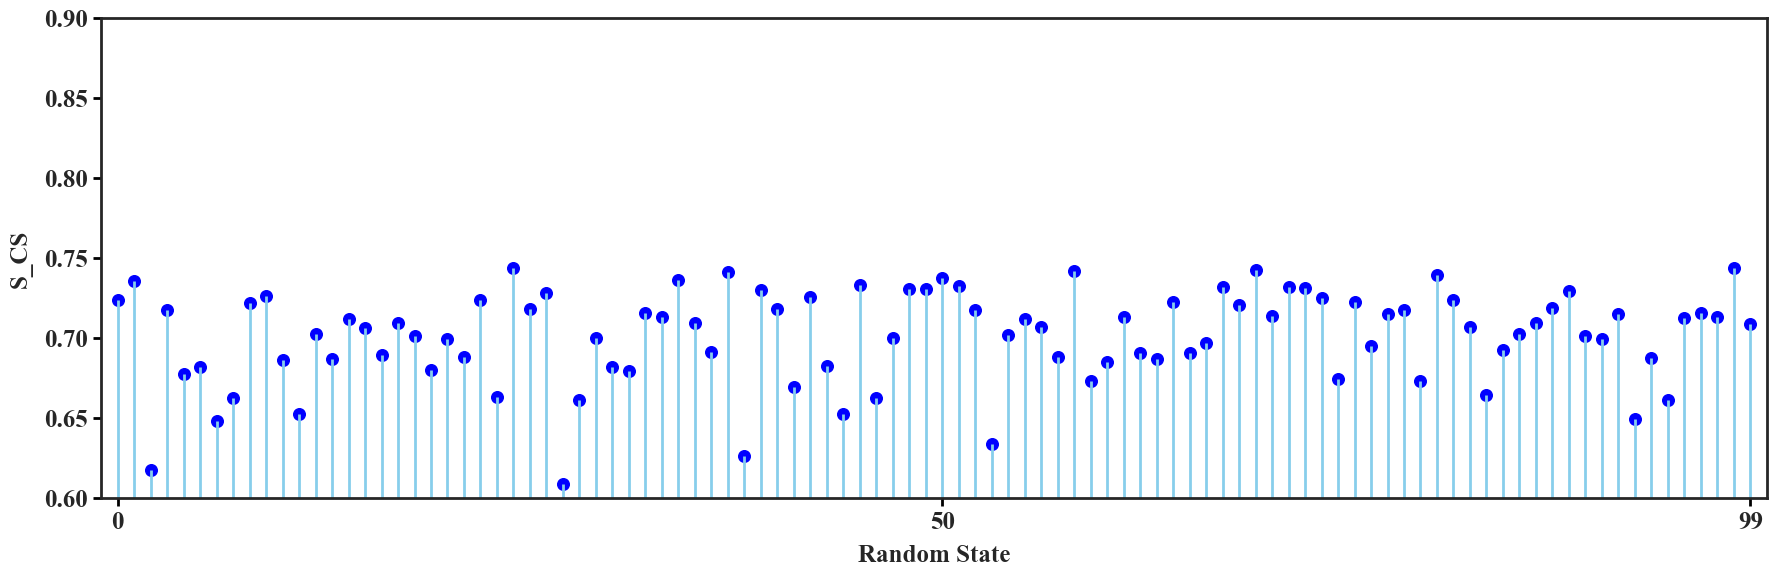

In [11]:
# 设置绘图风格
sns.set(style="white", font_scale=1.2)

# 创建棒棒糖图
plt.figure(figsize=(18, 6))

# 画线（棒棒糖杆） -> 垂直线，从 y=0 到 y=R2
plt.vlines(x=mean_r2_df['Seed'], ymin=0, ymax=mean_r2_df['R²'], color='skyblue', linewidth=2)

# 画点（棒棒糖头）
plt.scatter(mean_r2_df['Seed'], mean_r2_df['R²'], color='blue', s=70)

# 设置横坐标范围和刻度
plt.xticks(ticks=[0, 50, 99], labels=['0', '50', '99'], fontsize=18, fontname='Times New Roman', weight='bold')
plt.xlim(-1, 100)
plt.ylim(0.6, 0.9) # 设置x轴范围
plt.yticks(fontsize=18, fontname='Times New Roman', weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=6, width=2, color='black', bottom=True, top=False, left=True, right=False)

# 设置标题和标签
plt.xlabel('Random State', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)
plt.ylabel('S_CS', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)

# 设置边框粗细，比如加粗到2
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
# 去除顶部和右侧边框
# sns.despine()
plt.tight_layout()
plt.show()

In [12]:
score_df1.insert(0, 'Feature', 'S_CS')  
score_df1.to_csv('S_CS-平行实验-3.csv', index=False)